In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import scipy.stats as stats
import pandas as pd
import os
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
HOME = os.path.join(os.path.dirname(os.getcwd()), 'results/single_model_profs_new')
print HOME

/Users/cusgadmin/Desktop/plots-model-comp-paper/results/single_model_profs_new


In [13]:
# Extracts data as numpy array
def getE2ELats(FN):
    with open(FN) as json_data:
        d = json.load(json_data)
    data = d['client_metrics'][0]['all_lats']
    data = [str(x)[1:-1] for x in data] # remove brackets
    data = [x.split(', ') for x in data] # to list
    data = np.asarray(data).astype(float)
    return data
def getThrus(FN):
    with open(FN) as json_data:
        d = json.load(json_data)
    data = d['client_metrics'][0]['thrus']
    data = np.asarray(data).astype(float)
    return data
# Gets experiment info
def getInfo(FN):
    with open(FN) as json_data:
        d = json.load(json_data)
    return d['node_configs'][0]
def getQueueSize(FN):
    with open(FN) as json_data:
        d = json.load(json_data)
    all_trials = d['client_metrics'][0]["all_metrics"]
    data = [x["data_lists"][0]["tf-resnet-feats:1:queue_sizes"]["items"] for x in all_trials]
    data = [np.asarray(x).astype(int) for x in data]
    return data
def getQueueSize(FN):
    with open(FN) as json_data:
        d = json.load(json_data)
    all_trials = d['client_metrics'][0]["all_metrics"]
    data = [x["data_lists"][0]["tf-resnet-feats:1:queue_sizes"]["items"] for x in all_trials]
    data = [np.asarray(x).astype(int) for x in data]
    return data
def getQueueArrivalDeltas(FN):
    with open(FN) as json_data:
        d = json.load(json_data)
    all_trials = d['client_metrics'][0]["all_metrics"]
    data = [x["data_lists"][1]["tf-resnet-feats:1:queue_arrivals"]["items"] for x in all_trials]
    data = [np.asarray(x).astype(int)/1000 for x in data]
    data = [x[1:] - x[:-1] for x in data]
    return data
def getProcessingLatencies(FN):
    with open(FN) as json_data:
        d = json.load(json_data)
    all_trials = d['client_metrics'][0]["all_metrics"]
    data = [x["data_lists"][2]["tf-resnet-feats:processing_latency"]["items"] for x in all_trials]
    data = [np.asarray(x).astype(int) for x in data]
    return data
def getAggregate(arr, frac):
    return np.concatenate([x[int(len(x)*frac):] for x in arr])
def lineHistogram(data):
    y,binEdges=np.histogram(data)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    plt.plot(bincenters,y,'-')

4
Queue Sizes
[[   3.03787879    2.53139348  396.        ]
 [   3.78191489    2.46307718  376.        ]
 [   3.41176471    2.59515571  374.        ]
 [   2.67108753    2.5072012   377.        ]
 [   2.30458221    2.30345609  371.        ]
 [   2.45744681    2.38116795  376.        ]
 [   2.72340426    2.51923947  376.        ]
 [   3.95478723    2.36231751  376.        ]
 [   3.12664908    2.88105764  379.        ]
 [   3.25945946    3.33268079  370.        ]
 [   3.27777778    2.67680776  378.        ]]


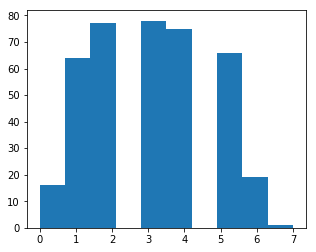

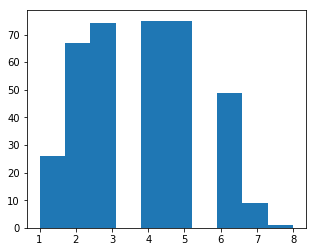

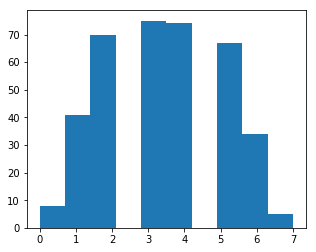

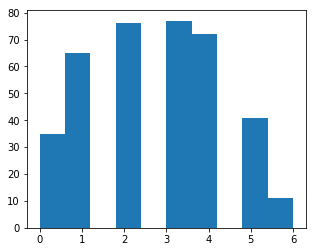

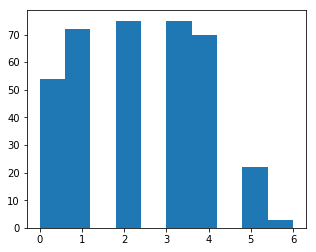

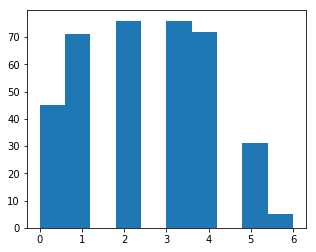

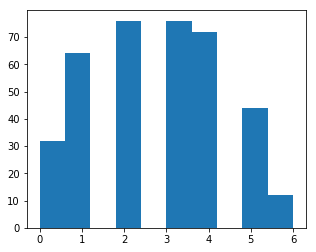

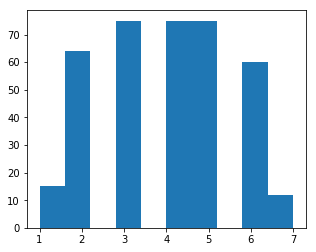

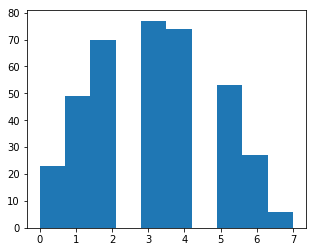

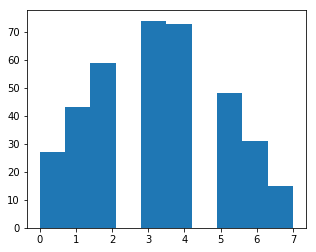

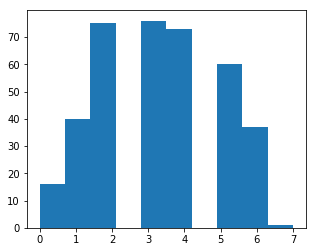

Arrival Deltas (ms)
[[   30.72204473  6148.57130317   313.        ]
 [   24.48         111.44293333   300.        ]
 [   24.47651007   102.1621999    298.        ]
 [   24.50333333    96.11665556   300.        ]
 [   24.47619048    95.7324263    294.        ]
 [   24.47333333   110.70262222   300.        ]
 [   24.47157191   107.99501124   299.        ]
 [   24.47666667    97.37612222   300.        ]
 [   24.47682119    89.25608526   302.        ]
 [   24.47278912   110.11320515   294.        ]
 [   24.4717608     92.30900321   301.        ]]


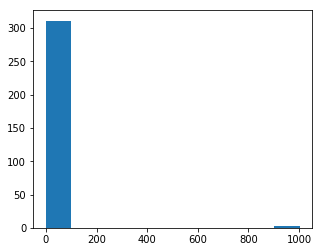

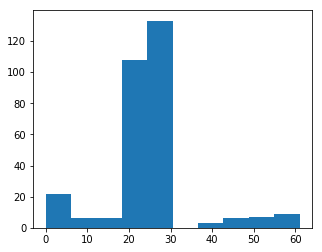

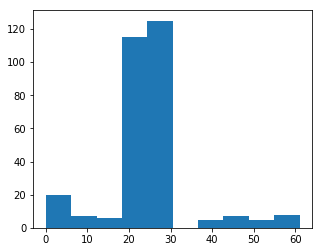

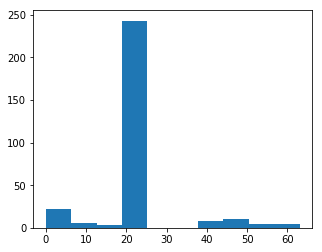

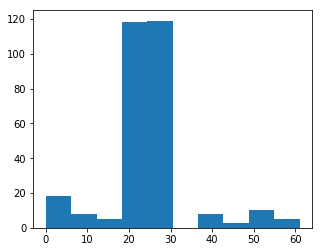

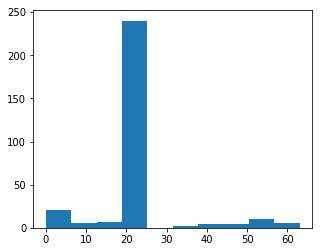

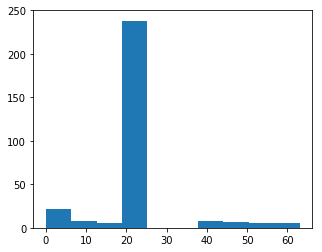

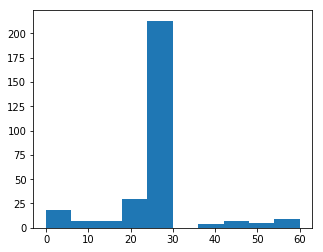

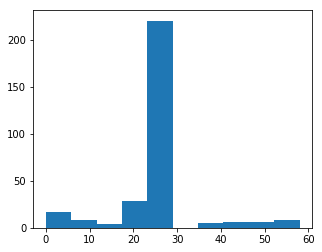

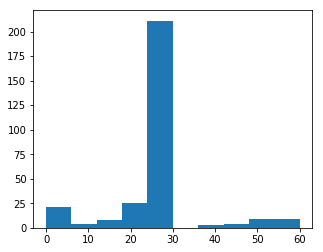

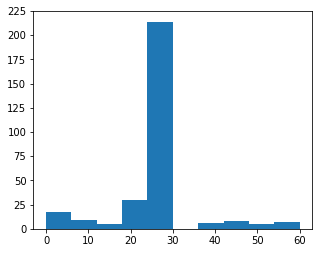

Processing Latencies (ms)
[[  2.60890244e+02   3.06638146e+05   8.20000000e+01]
 [  1.82666667e+02   3.94462222e+02   7.50000000e+01]
 [  1.82093333e+02   4.04591289e+02   7.50000000e+01]
 [  1.79500000e+02   3.81697368e+02   7.60000000e+01]
 [  1.77486842e+02   3.33907722e+02   7.60000000e+01]
 [  1.79342105e+02   3.66514543e+02   7.60000000e+01]
 [  1.80000000e+02   3.81921053e+02   7.60000000e+01]
 [  1.83440000e+02   3.44353067e+02   7.50000000e+01]
 [  1.81460526e+02   3.48537916e+02   7.60000000e+01]
 [  1.79426667e+02   4.28377956e+02   7.50000000e+01]
 [  1.81092105e+02   3.89899411e+02   7.60000000e+01]]


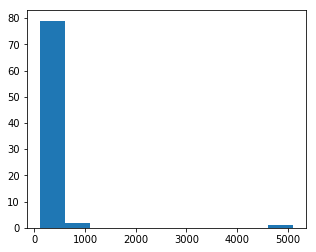

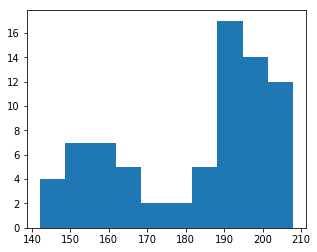

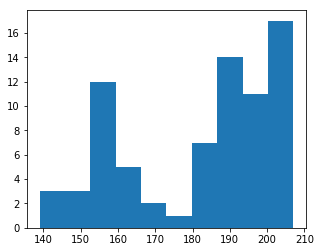

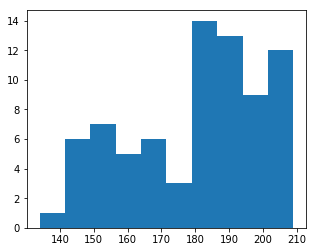

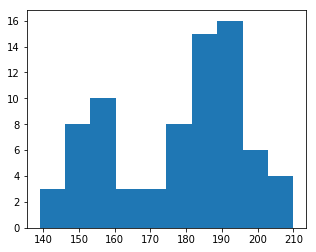

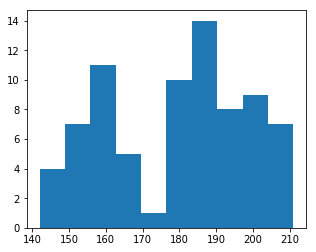

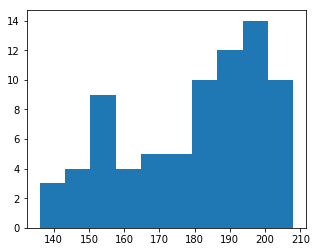

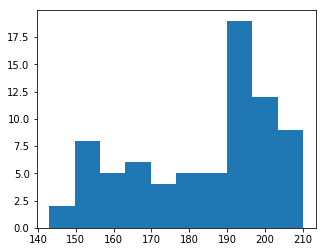

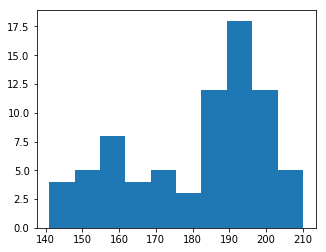

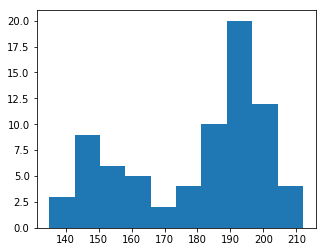

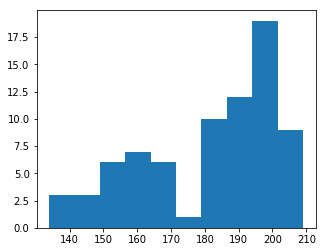

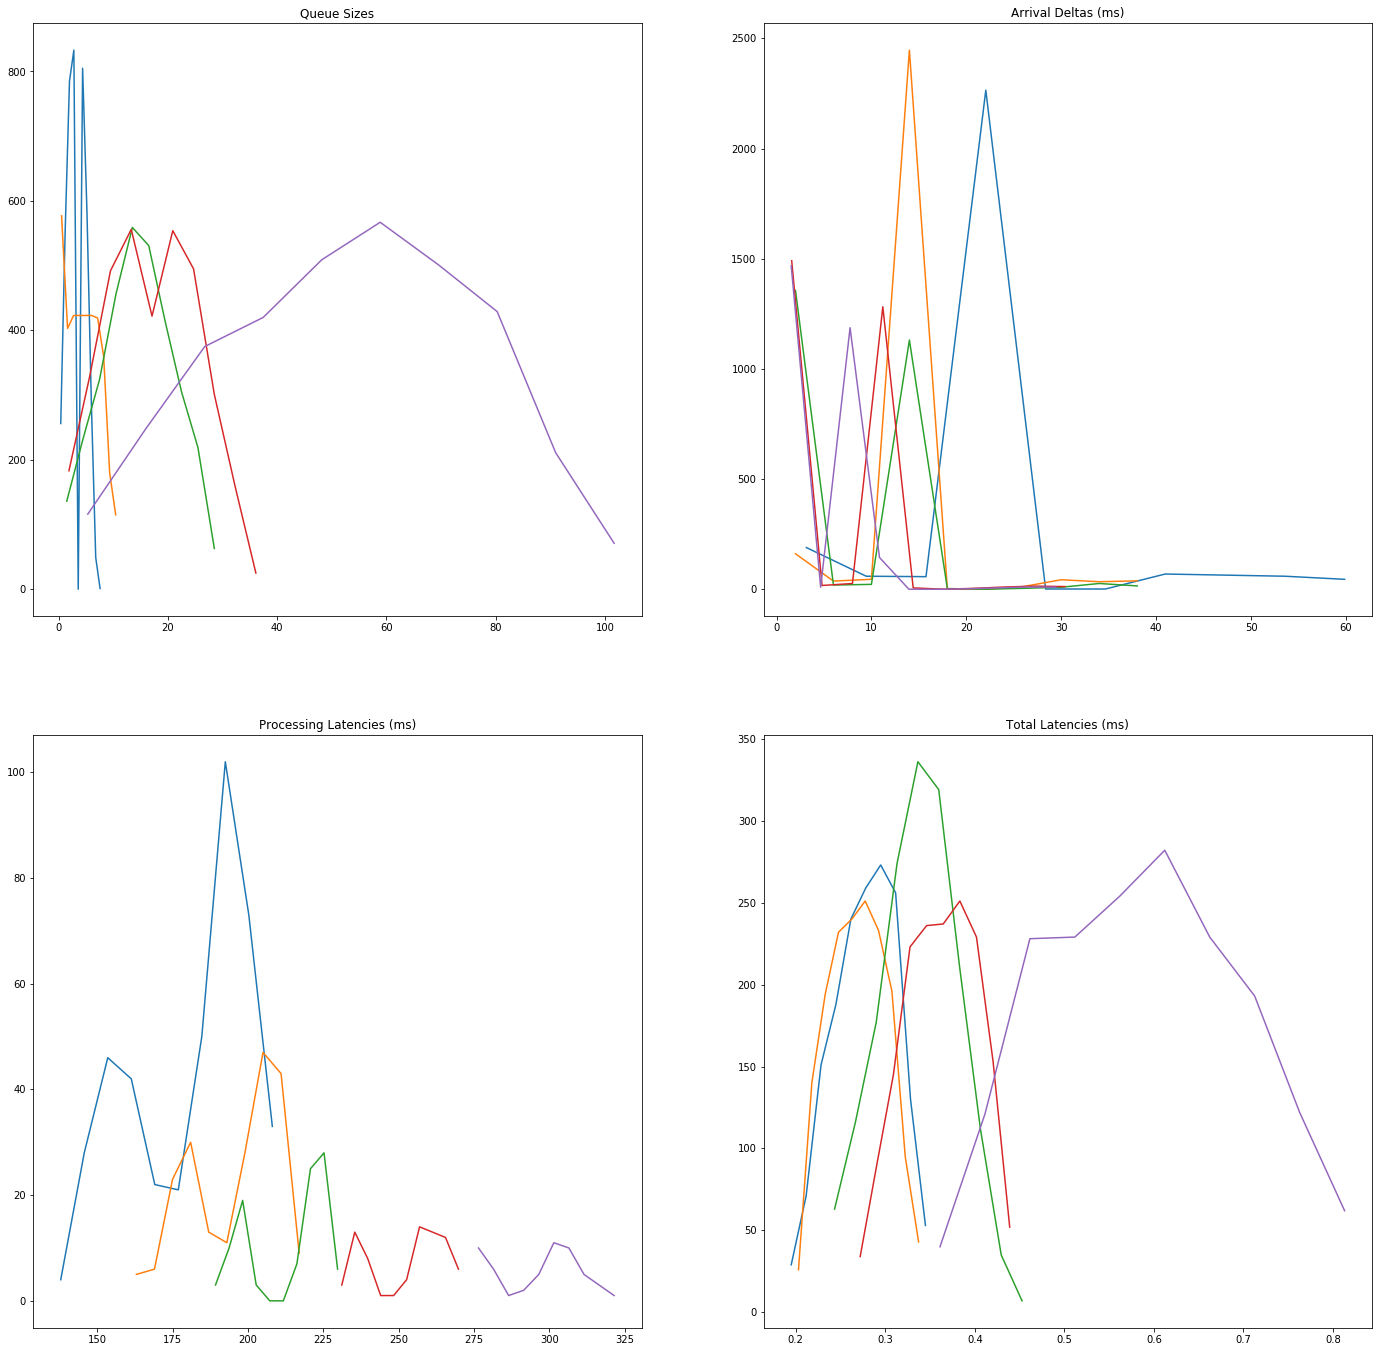

In [14]:
 file_list = [
    "results-180203_024712.json", # 4
    "results-180203_005831.json", # 8
    "results-180203_050909.json", # 16
    "results-180203_031712.json", # 24
    "results-180203_032910.json"  # 32
]

def infoSummary(FN):
    print getInfo(HOME+"/"+FN)["batch_size"]
    # print np.asarray([(np.mean(x), np.var(x)) for x in Q_sizes])
    # print np.asarray([(np.mean(x), np.var(x)) for x in Q_arrival_deltas])
    # print np.asarray([(np.mean(x), np.var(x)) for x in Processing_latencies])
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    Q_sizes = getQueueSize(HOME+"/"+FN)
    plt.title("Queue Sizes")
    plt.hist(getAggregate(Q_sizes, 0))
    lineHistogram(getAggregate(Q_sizes, 0))
    plt.subplot(1,3,2)
    Q_arrival_deltas = getQueueArrivalDeltas(HOME+"/"+FN)
    plt.title("Arrival Deltas (ms)")
    plt.hist(getAggregate(Q_arrival_deltas, 0.15))
    lineHistogram(getAggregate(Q_arrival_deltas, 0.15))
    plt.subplot(1,3,3)
    Processing_latencies = getProcessingLatencies(HOME+"/"+FN)
    plt.title("Processing Latencies (ms)")
    plt.hist(getAggregate(Processing_latencies, 0.5))
    lineHistogram(getAggregate(Processing_latencies, 0.5))
    plt.show()

def infoSummary2(FN):
    print getInfo(HOME+"/"+FN)["batch_size"]
    Q_sizes = getQueueSize(HOME+"/"+FN)
    print ("Queue Sizes")
    print np.asarray([(np.mean(x), np.var(x), len(x)) for x in Q_sizes])
    for x in Q_sizes:
        plt.hist(x)
        plt.show()
    Q_arrival_deltas = getQueueArrivalDeltas(HOME+"/"+FN)
    print ("Arrival Deltas (ms)")
    print np.asarray([(np.mean(x), np.var(x), len(x)) for x in Q_arrival_deltas])
    for x in Q_arrival_deltas:
        plt.hist(x)
        plt.show()
    Processing_latencies = getProcessingLatencies(HOME+"/"+FN)
    print ("Processing Latencies (ms)")
    print np.asarray([(np.mean(x), np.var(x), len(x)) for x in Processing_latencies])
    for x in Processing_latencies:
        plt.hist(x)
        plt.show()
    plt.show()

infoSummary2(file_list[0])

plt.figure(figsize=(24,24))
plt.subplot(2,2,1)
plt.title("Queue Sizes")
for FN in file_list:
    Q_sizes = getQueueSize(HOME+"/"+FN)
    lineHistogram(getAggregate(Q_sizes, 0))
plt.subplot(2,2,2)
plt.title("Arrival Deltas (ms)")
for FN in file_list:
    Q_arrival_deltas = getQueueArrivalDeltas(HOME+"/"+FN)
    lineHistogram(getAggregate(Q_arrival_deltas, 0.15))
plt.subplot(2,2,3)
plt.title("Processing Latencies (ms)")
for FN in file_list:
    Processing_latencies = getProcessingLatencies(HOME+"/"+FN)
    lineHistogram(getAggregate(Processing_latencies, 0.5))
plt.subplot(2,2,4)
plt.title("Total Latencies (ms)")
for FN in file_list:
    E2E_latencies = getE2ELats(HOME+"/"+FN)
    lineHistogram(getAggregate(E2E_latencies, 0.5))
plt.show()


In [136]:
'''Each plot is one trial of one experiment, each row of plots is an entire set of trials
of a particular experiment, ordered from left to right'''
num_files = 6
for subdir, dirs, files in os.walk(HOME):
    plt.figure(figsize=(8,8))
    for file in files:
        if os.path.splitext(file)[1] != ".json":
            continue
        PATH = subdir+"/"+file
        data = getData(PATH)
        data = data[-1:,-data.shape[1]/2:]
        info = getInfo(PATH)
#         print info
        BS = info["batch_size"]
        CPUs = info["cpus_per_replica"]
        GPUs = info.get("gpus_per_replica")
        GPU_type = info.get("gpu_type")
        print info["name"]+" BS:"+str(BS)+" CPUs:"+str(CPUs)+" GPUs:"+str(GPUs)+" GPU_type:"+str(GPU_type)
        flattened = data.flatten()
        thrus = getThrus(PATH)[1:]
        has_gpu = GPUs > 0 or GPU_type != None
        thru_color = "orange" if GPUs == 0 else "red"
        lat_color = "green" if GPUs == 0 else "blue"
        ax = plt.subplot(2,1,1)
        plt.title("Latencies")
        ax.boxplot(flattened,positions=[BS], widths=1.5)
        ax.set_xlim(0, 50)
        plt.xticks(np.arange(0, 50, 10),np.arange(0, 50, 10))
        plt.subplot(2,1,2)
        plt.title("Throughputs")
        plt.scatter(BS*np.ones_like(thrus), thrus,color=thru_color, marker='x')
        plt.scatter(BS, np.mean(thrus), color="black", marker='o')
    plt.show()
    num_files-=1
    if num_files == 0:
        print "breaking"
        break



NameError: name 'getData' is not defined